# I. Introduction to Scikit-learn

Scikit-learn is a commonly used Machine Learning library in Python. It is widely accessible and is notable for its ease of use, largely attributed to the plethora of built in ML packages it possesses. Here, I am going to dive a bit deeper into the fundamentals of ML, and complete a classification project on a toy image dataset. This project will test: ML pipeline build (model selection, instantiation, test/train and prediction/evaluation) as well as classification algorithm use and introductory cross-validation.

### Step 1. Import the necessary libraries

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Step 2. Import the `digits` toy dataset from Scikitlearn
This is a copy of the test set of the UCI ML hand-written digits datasets https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The dataset contains images of hand-written digits: 10 classes where each class refers to a digit.

Each datapoint is a 8x8 image of a digit; Classes=10, Samples per class ~180.

Samples total = 1797, Dimensionality = 64, and Features = integers 0-16


After importing this dataset, split it into test and train sets. Check the shape of data and the target attributes of the dataset. Print a few samples from the dataset.

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()


In [25]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [26]:
X,y = digits.data, digits.target

### Setting data and target features of the digits dataset to x and y variables.

In [27]:
X.shape

### Our dataset (X) now has 1797 observations and 64 features.

(1797, 64)

In [28]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [29]:
y[:20]

### Shows us corresponding y values: the second row of x corresponds to 1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
(np.bincount(y))

### Counts the number of occurrences of each value in y array.

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [31]:
X[1].shape

### Before we plot this, need to turn it into an 8x8 matrix
### 8x8 because 8x8 = 64 pixels (picture consists of 64 pixels total)

(64,)

In [33]:
X[1].reshape(8,8)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

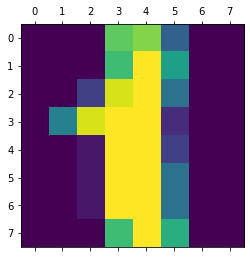

In [34]:
plt.matshow(X[1].reshape(8,8))

### Whenever we work with ML models we need to turn the data into numbers that the algorithm can ingest

# II. Sklearn API for model training
-------------------
### Step 1. Import your model class

As an example, I will use a `LinearSVC`, a linear support vector classifier. This classifier is imprted from `sklearn.svm` module which includes Support Vector Machine algorithms. I have never used this algorithm before, but knowing every single ML algorithm is less important than knowing their appropriate use cases.

In [35]:
from sklearn.svm import LinearSVC

### Step2. Instantiate an object and set the parameters

In [39]:
svm = LinearSVC()
#svm2 = LinearSVC()

### Step 3. Fit the model
When fitting the model, use the train dataset.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10)

In [41]:
svm.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

### Step 4. Predict and Evaluate
Use the test set for this purpose, for now.

In [42]:
X_train.shape

### Shape of train dataset: 1347 observations and 64 features.

(1347, 64)

In [43]:
svm.predict(X_train)

### Predicted x values in the train dataset

array([9, 3, 1, ..., 1, 8, 2])

In [44]:
print(y_train)



[9 3 1 ... 1 8 2]


In [45]:
svm.score(X_train, y_train)

### Possible overfitting if train dataset does better than test dataset 
### Training performance is measured in accuracy
### If overfitting occurs, should do additional tests to confirm *not shown here

0.994060876020787

In [46]:
svm.score(X_test, y_test)

### Test performance measured in accuracy
### Always expect a difference between test and train accuracy, but shouldn't be too stark

0.9533333333333334

### Step5. Try another Algorithm
Here I will try the `RandomForestCLassifier` instead, imported from the `sklearn.ensemble` module.

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(n_estimators = 50)

### n_estimators = hyperparameter

In [49]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [50]:
rf.score(X_train, y_train)

1.0

In [51]:
rf.score(X_test, y_test)

### Note: I observe a slightly different accuracy measure in test performance when using a different classifier.

0.9644444444444444

# II. Cross-validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

A model is trained using of the folds as training data; the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small. (Check https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [56]:
scores = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv = 5)

### Note: Cross-validation does not produce a model
### Remove "scores" alias to see output
### cv = how many folds to divide the training data into
### retuns an array of 5 scores: X1, X2...X5. I.e the scores of 1/5th of my dataset used for training purposes.
### I.e the distribution of scores in 1 dataset

In [57]:
scores.mean(), scores.std()

### Not much variation i.e not much overfitting occuring at a glance

(0.9799614484372849, 0.0037511753624214594)